# Rede Neural Artificial para Regressão

Neste notebook, veremos a demonstração do uso de uma **[Feedforward Neural Network](https://en.wikipedia.org/wiki/Feedforward_neural_network)** para a tarefa de Regressão, usando a biblioteca PyTorch.

É importante lembrarmos que este experimento envolverá dados sintéticos, ou seja, dados que serão gerados por nós.

Começaremos importando as bibliotecas que vamos precisar:

In [1]:
import torch
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

Construindo o dataset:

In [2]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # distribuído uniformemente entre (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

Isso implementa a função:

$$ y = \cos(2x_1) + cos(3x_2) $$

Plotamos os dados:

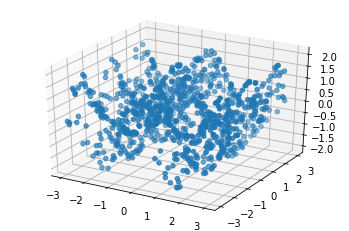

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

Então construímos o modelo:

In [4]:
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

Definimos a Loss e o Optimizer:

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Treinamos o modelo:

In [6]:
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
    train_losses = np.zeros(epochs)

    for it in range(epochs):
        # Zerar os parâmetros do gradient
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward e optimize
        loss.backward()
        optimizer.step()

        # Salvar os losses
        train_losses[it] = loss.item()

        if (it + 1) % 50 == 0:
            print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}')
  
  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.6408
Epoch 100/1000, Train Loss: 0.2313
Epoch 150/1000, Train Loss: 0.1343
Epoch 200/1000, Train Loss: 0.0699
Epoch 250/1000, Train Loss: 0.0262
Epoch 300/1000, Train Loss: 0.0097
Epoch 350/1000, Train Loss: 0.0056
Epoch 400/1000, Train Loss: 0.0050
Epoch 450/1000, Train Loss: 0.0034
Epoch 500/1000, Train Loss: 0.0037
Epoch 550/1000, Train Loss: 0.0027
Epoch 600/1000, Train Loss: 0.0129
Epoch 650/1000, Train Loss: 0.0024
Epoch 700/1000, Train Loss: 0.0022
Epoch 750/1000, Train Loss: 0.0027
Epoch 800/1000, Train Loss: 0.0030
Epoch 850/1000, Train Loss: 0.0022
Epoch 900/1000, Train Loss: 0.0022
Epoch 950/1000, Train Loss: 0.0020
Epoch 1000/1000, Train Loss: 0.0019


Plotamos o loss por iteração:

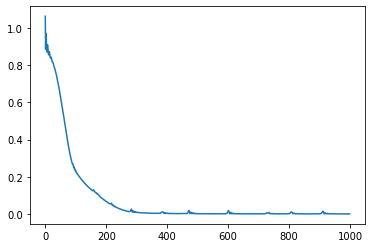

In [7]:
plt.plot(train_losses);

Plotamos a superfície de previsão:

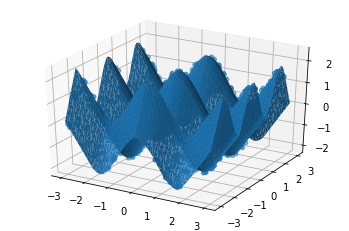

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

with torch.no_grad():
    line = np.linspace(-3, 3, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
    plt.show()

O gráfico confirma, que embora a nossa rede neural seja apenas diversas equações lineares, ainda sim, ela consegue aproximar a soma de cossenos.

Neste caso, podemos aproximar uma equação de cosseno, sem usar diretamente o cosseno.

Por fim, vamos testar se a rede neural pode extrapolar, sabemos que a função cosseno irá repetir periodicamente de **-infinito** até **+infinito**.

A questão é: será a rede neural pode descobrir este fato?

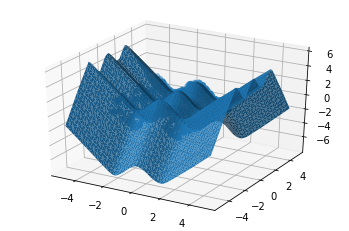

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

with torch.no_grad():
    line = np.linspace(-5, 5, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
    plt.show()

Veja que não funciona, pois ela assume que o padrão continua na direção das bordas, isso porque a rede neural não possui uma função de ativação periódica.